In [ ]:
!pip install opendatasets

#Import Used Libraries

In [ ]:
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
od.download(
    "https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: onsymers
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023


100%|██████████| 143M/143M [00:05<00:00, 26.5MB/s]


In [ ]:
#Load dataset
df = pd.read_csv('/content/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv')

In [ ]:
# data overview
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


# Data Exploration And Visualization

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

**There is not null values**

In [ ]:
df.isnull().sum()

,0
id,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


---
####We Need to drop **id** column from the dataset

In [ ]:
df.drop(columns=['id'], inplace=True)

---
####**Observation**: All Independent features from V1 to V28 are scaled by StandardScaler() as the mean is equal to 0 and have varainces equal to 1 and the "Amount" column is not scaled so we need to scale it by StandardScaler()

In [ ]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,1.991314e-16,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [ ]:
desc = df.describe()
desc = desc.round(2)

In [ ]:
desc[['V1','V2','V3','V4','V5','V6','V7','Amount','Class']]

,V1,V2,V3,V4,V5,V6,V7,Amount,Class
count,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.0
mean,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,12041.96,0.5
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,6919.64,0.5
min,-3.50,-49.97,-3.18,-4.95,-9.95,-21.11,-4.35,50.01,0.0
25%,-0.57,-0.49,-0.65,-0.66,-0.29,-0.45,-0.28,6054.89,0.0
50%,-0.09,-0.14,0.00,-0.07,0.08,0.08,0.23,12030.15,0.5
75%,0.83,0.34,0.63,0.71,0.44,0.50,0.53,18036.33,1.0
max,2.23,4.36,14.13,3.20,42.72,26.17,217.87,24039.93,1.0


---
####**Class** is Balanced

In [ ]:
df['Class'].value_counts()

,count
Class,
0,284315
1,284315


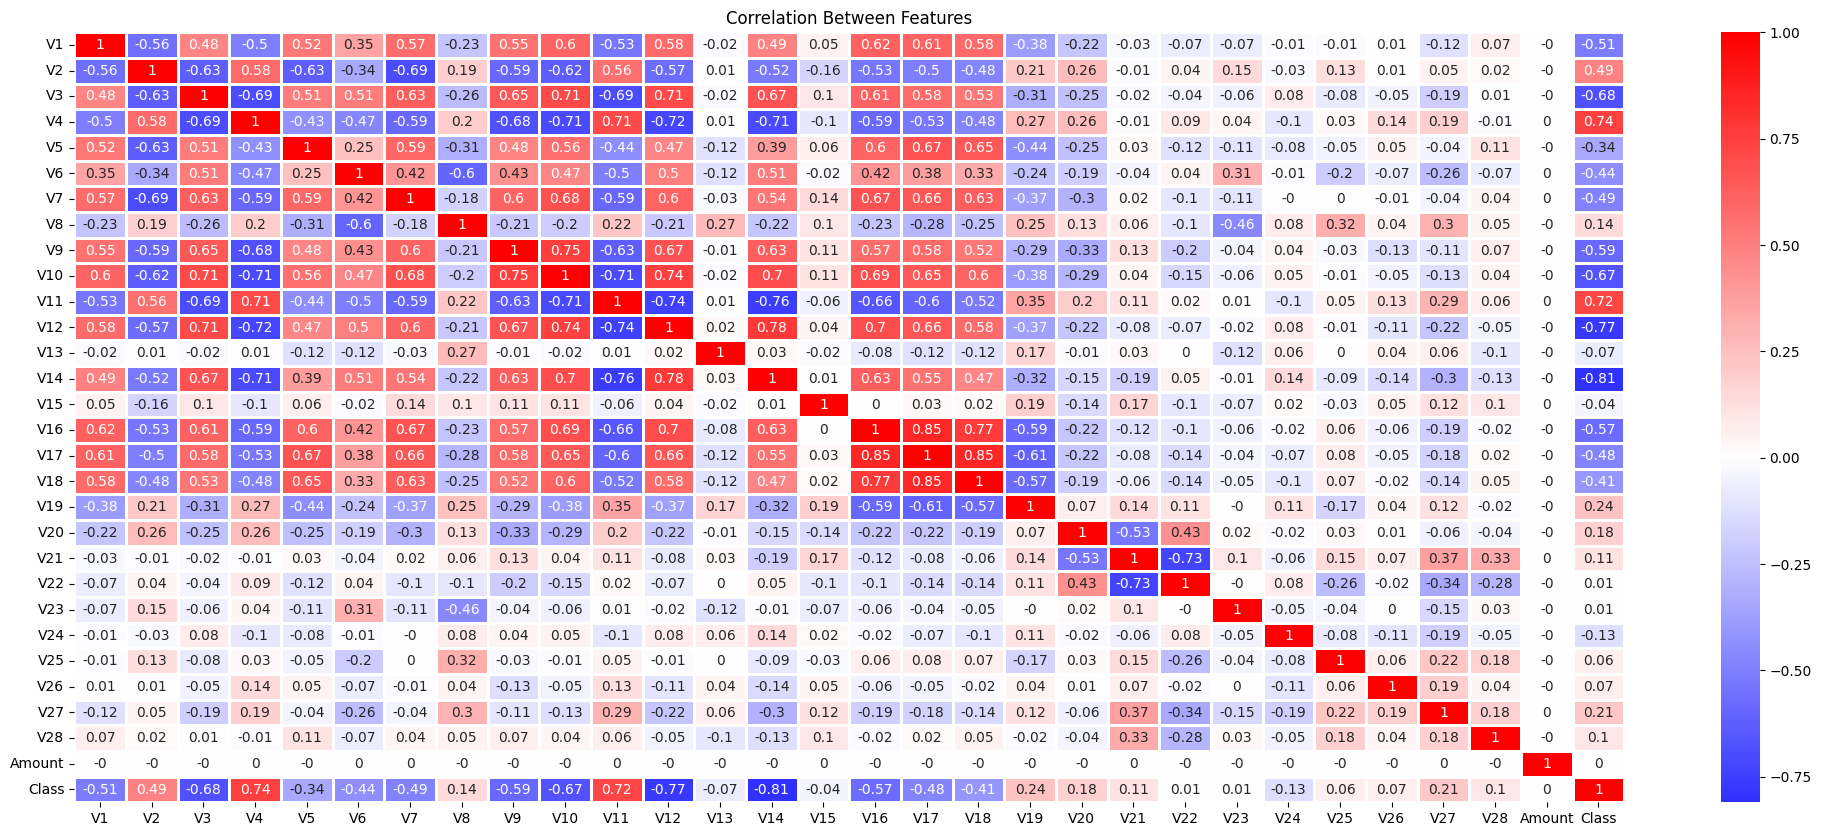

In [ ]:
df_corr = df.corr()
df_corr = df_corr.round(2)
plt.figure(figsize=(25,10))
sns.heatmap(df_corr, annot=True,cmap='bwr', linewidths=2, linecolor='white', center=0)
plt.title('Correlation Between Features')
plt.show()


The Amount Class has no effect on the output
there are some feature are strongly correlated, need more invistigation as
- V12 and V11
- V14 and V11
- V4 and Class

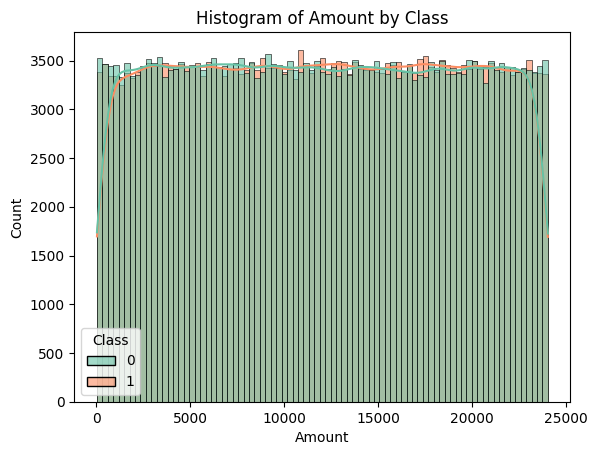

In [ ]:
sns.histplot(data=df, x='Amount', hue='Class', kde=True, palette='Set2',alpha=0.6)
plt.title("Histogram of Amount by Class")
plt.show()

In [ ]:
df['Class'] = df['Class'].astype('category')

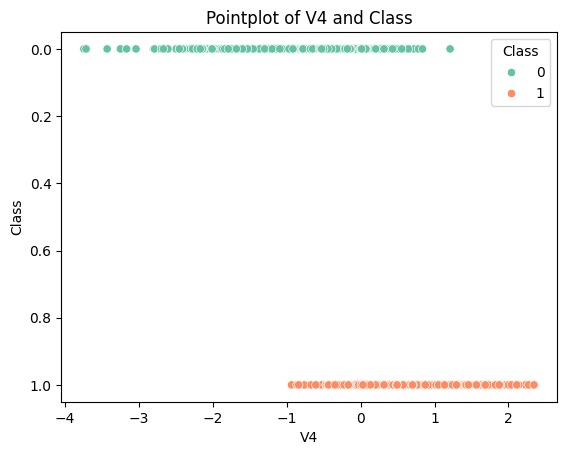

In [ ]:
sns.scatterplot(data=df.sample(2000), x='V4', y='Class',palette='Set2', hue='Class', markers={'0':'o', '1':'X'})
plt.title("Pointplot of V4 and Class")
plt.show()

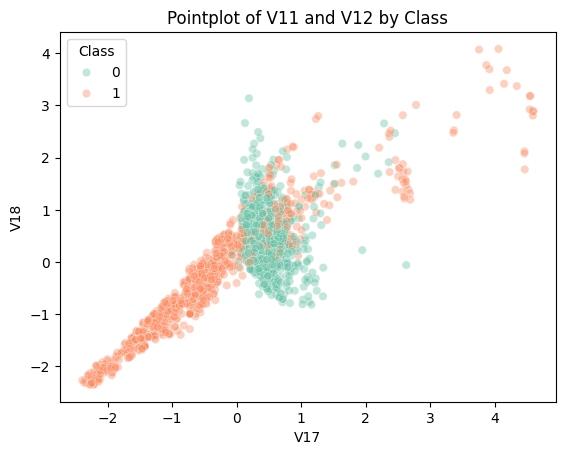

In [ ]:
sns.scatterplot(data=df.sample(2000), x='V17', y='V18',palette='Set2', hue='Class', alpha=0.4, markers={'0':'o', '1':'X'})
plt.title("Pointplot of V11 and V12 by Class")
plt.show()

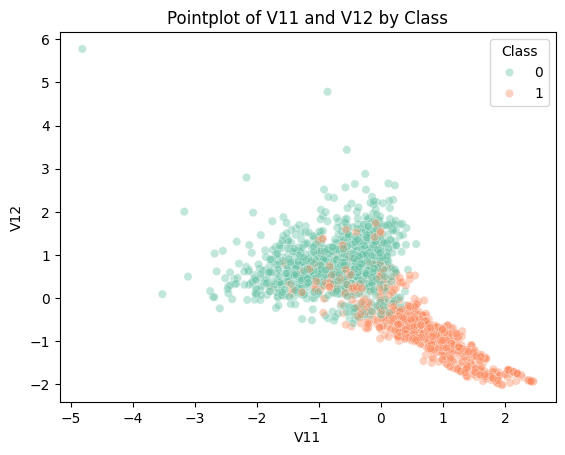

In [ ]:
sns.scatterplot(data=df.sample(2000), x='V11', y='V12',palette='Set2', hue='Class', alpha=0.4, markers={'0':'o', '1':'X'})
plt.title("Pointplot of V11 and V12 by Class")
plt.show()

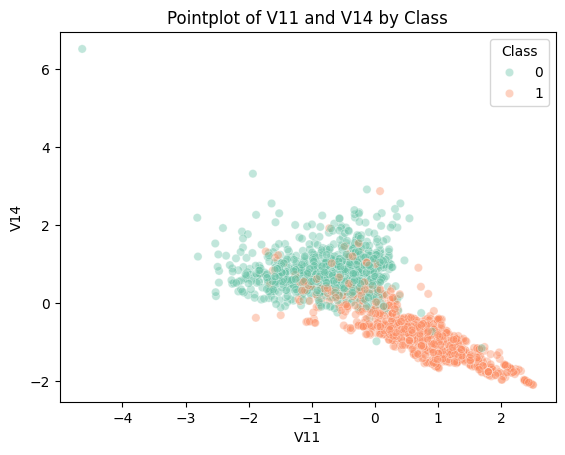

In [ ]:
sns.scatterplot(data=df.sample(2000), x='V11', y='V14',palette='Set2', hue='Class', alpha=0.4, markers={'0':'o', '1':'X'})
plt.title("Pointplot of V11 and V14 by Class")
plt.show()

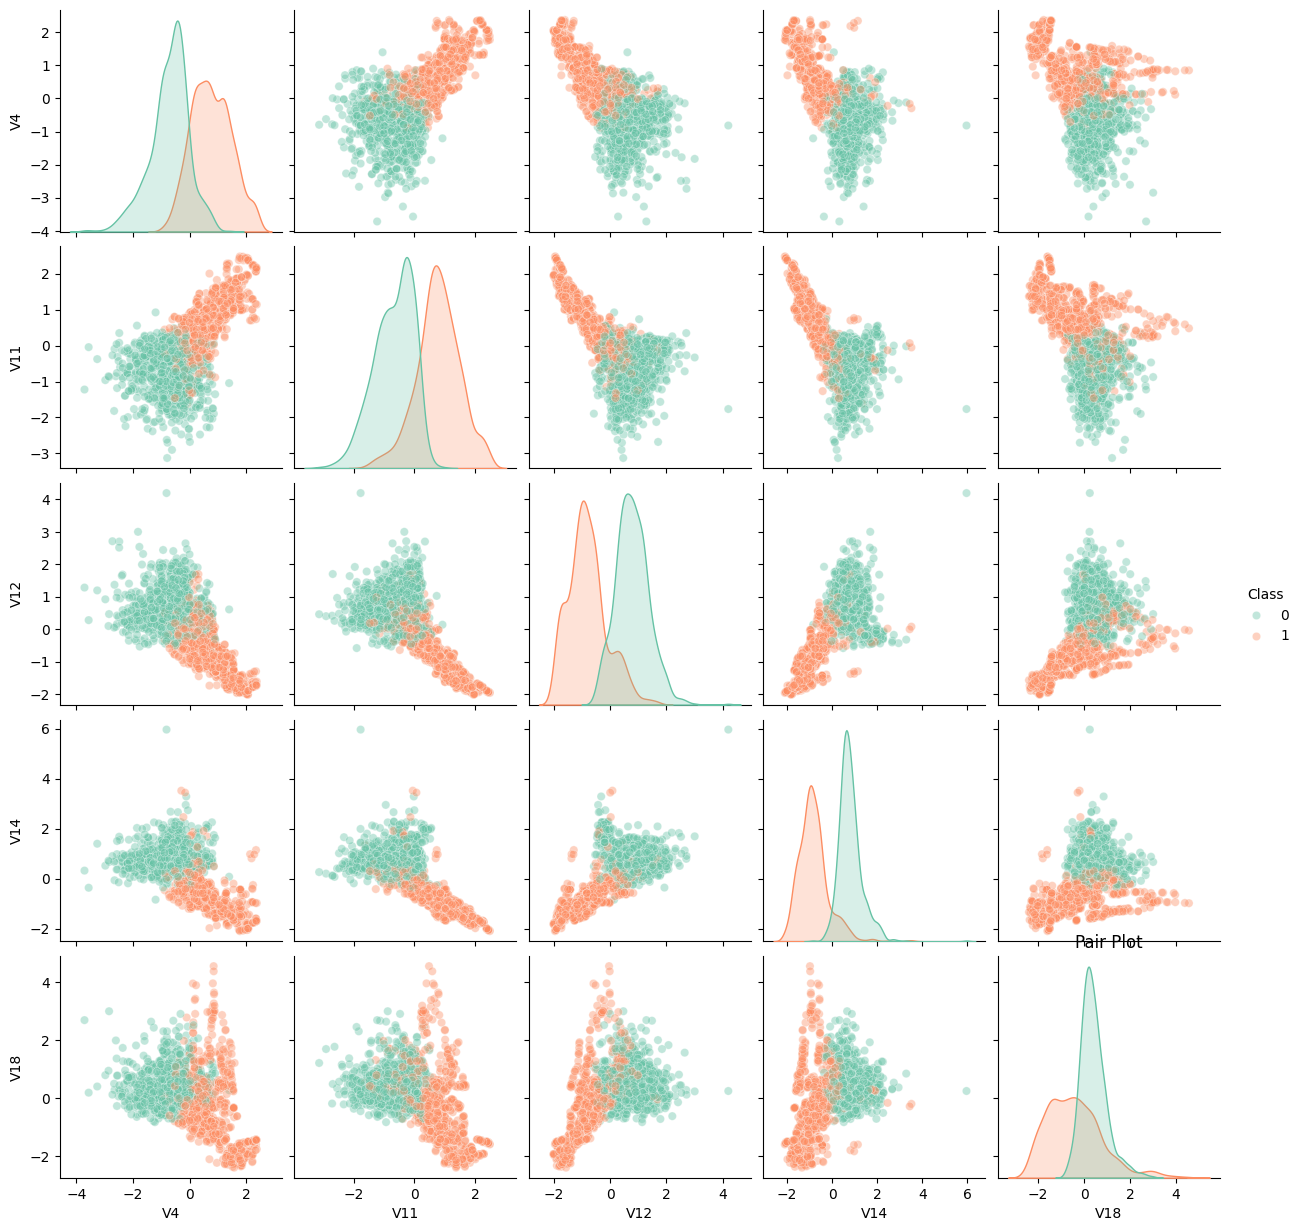

In [ ]:
sns.pairplot(df[['V4','V11','V12','V14','V18', 'Class']].sample(2000), hue='Class', palette='Set2', plot_kws={'alpha': 0.4})
plt.title('Pair Plot')
plt.show()

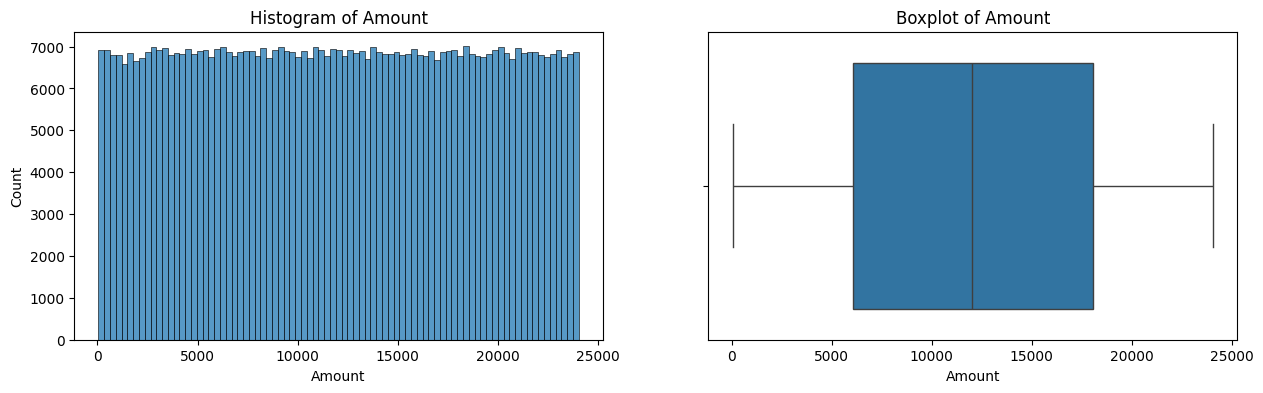

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.histplot(data=df, x='Amount')
plt.title("Histogram of Amount")
plt.subplot(1,2,2)
sns.boxplot(data=df, x='Amount')
plt.title("Boxplot of Amount")
plt.show()

---
####Observation: There are a lot of outliers in the data and we need to handle it

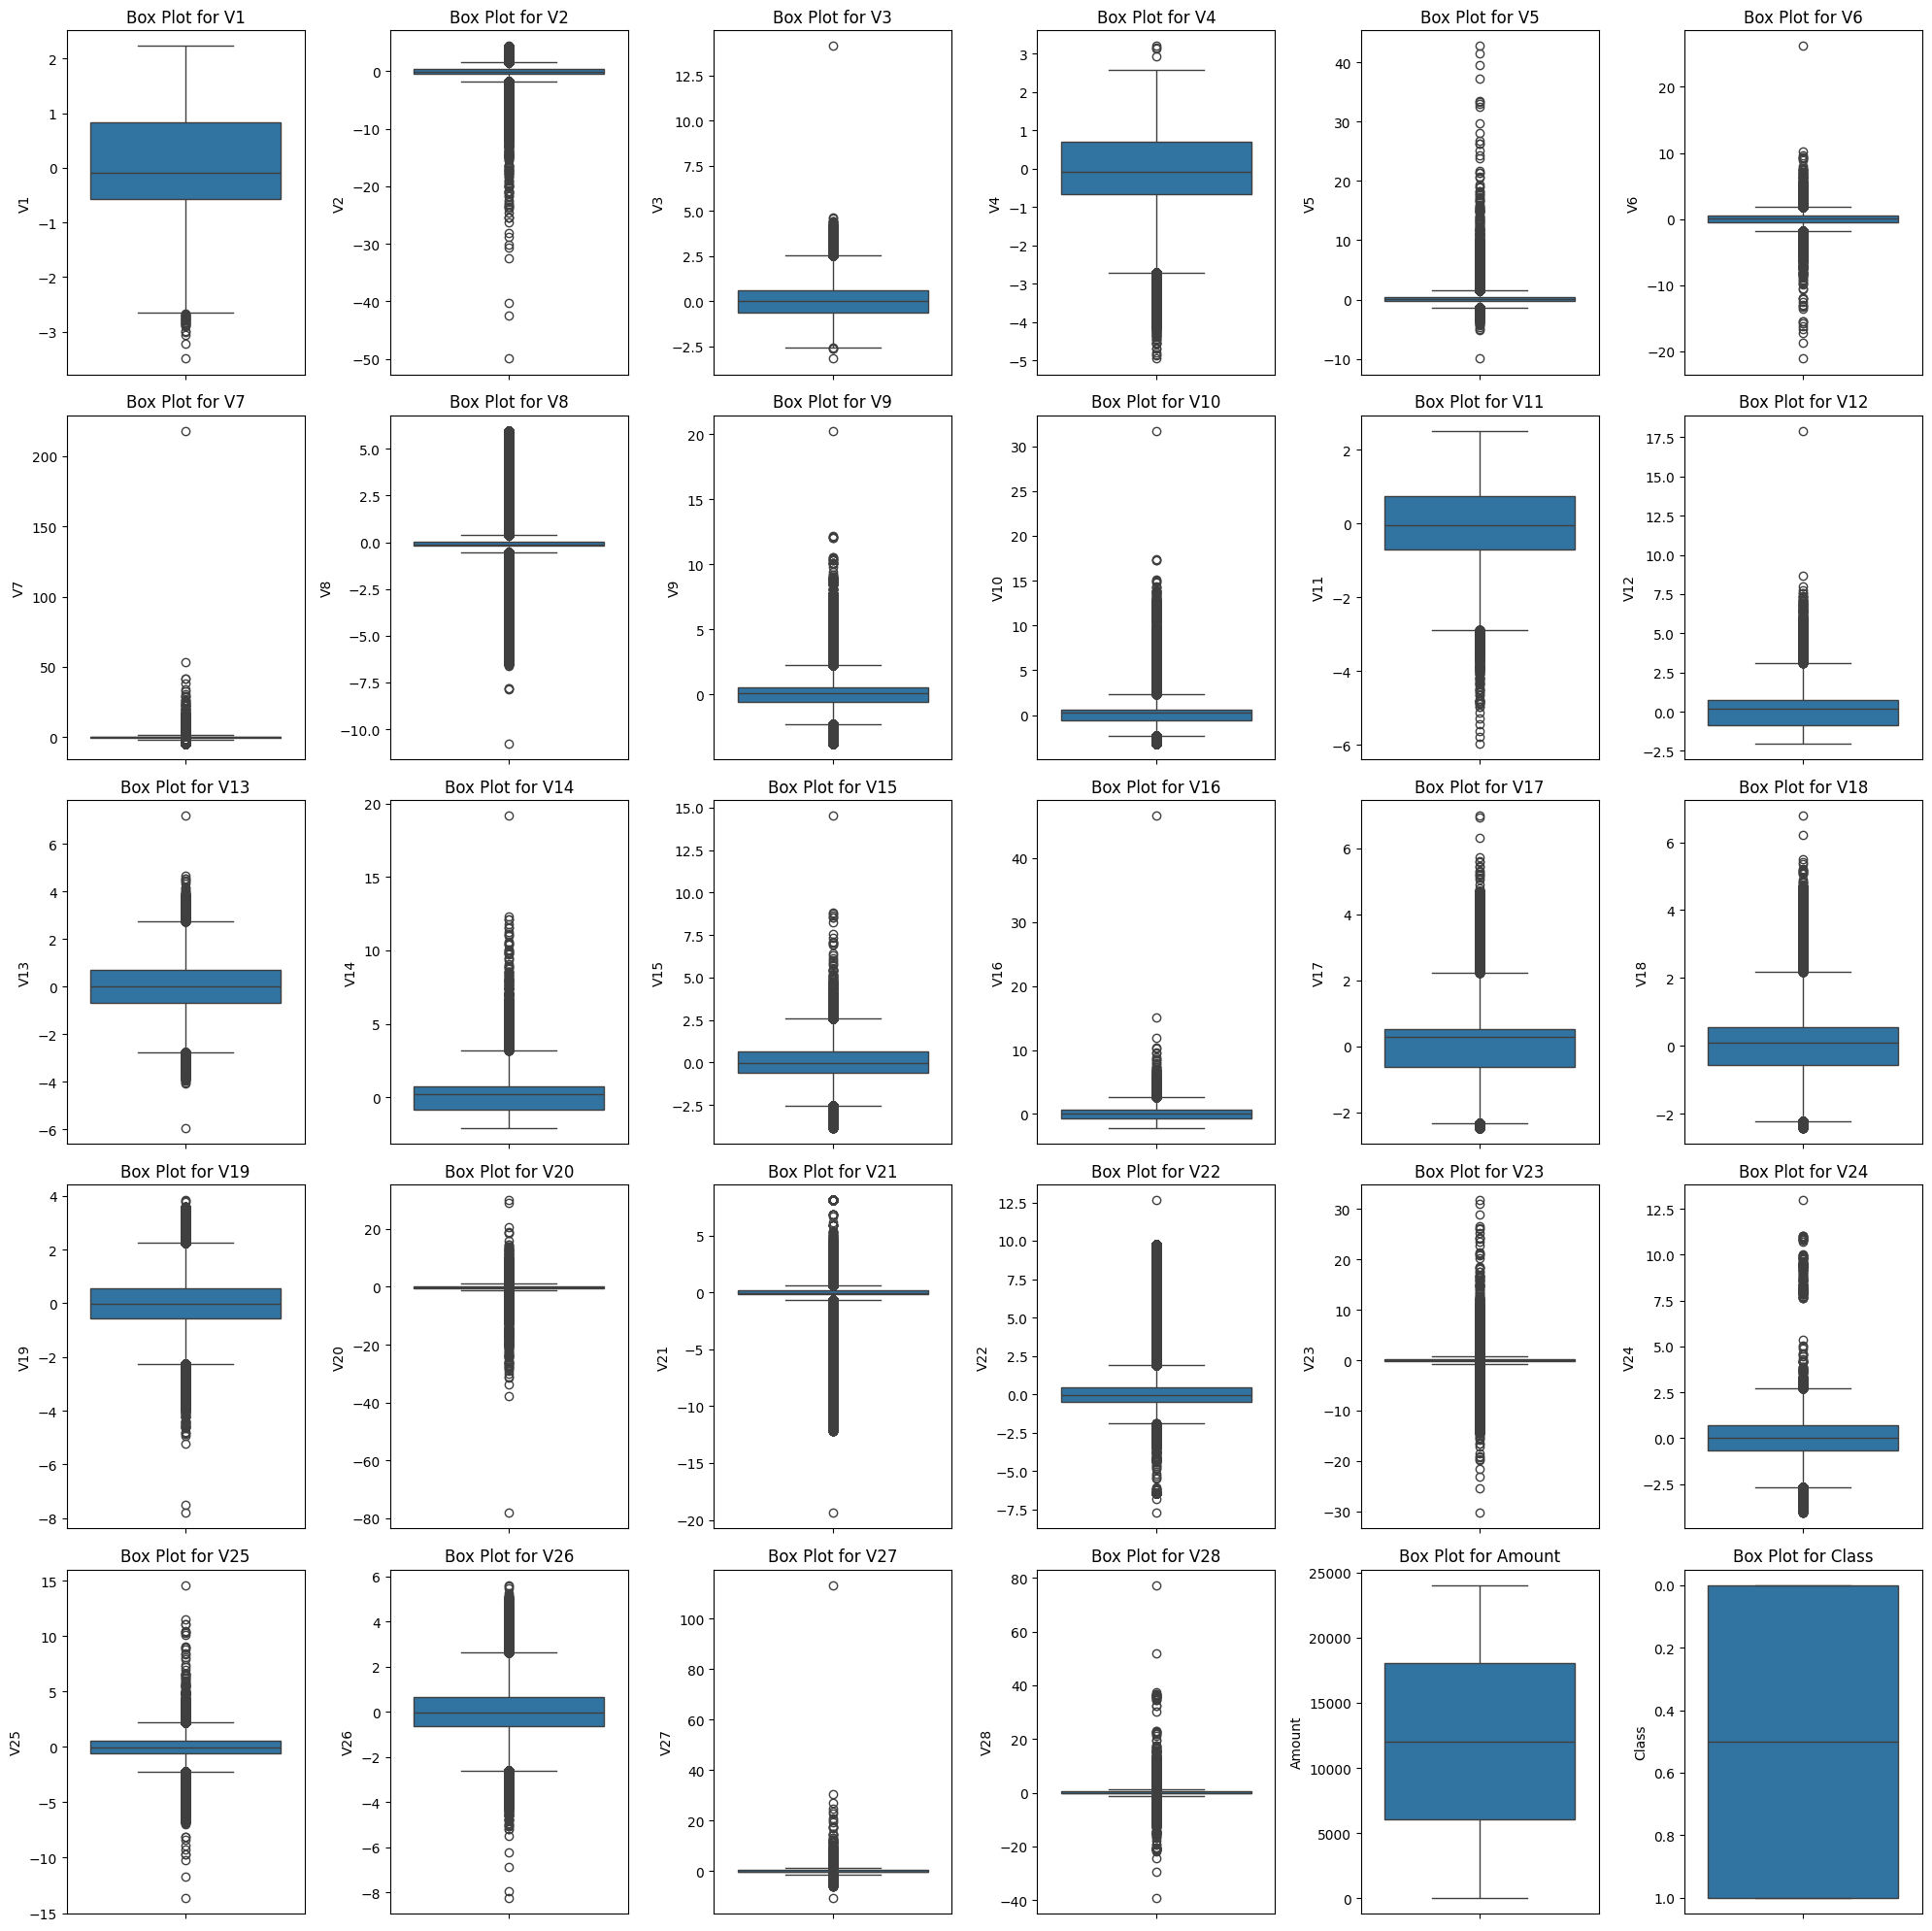

In [ ]:
# Check the outliers
fig, axes = plt.subplots(5,6,figsize = (20,20))
axes = axes.flatten()
for i, column in enumerate(df.columns):
    sns.boxplot(df[column], ax= axes[i])
    axes[i].set_title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

---
# Data Preprocessing

---
#### Since the Amount and Class Column have 0 Correlation Coef., therefor we can drop this column

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay , classification_report ,f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

In [ ]:
df.drop(columns=['Amount'], inplace=True)

In [ ]:
X = df.drop(columns=['Class'])
y = df['Class']

---
####Split the data to Train and test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((454904, 28), (113726, 28), (454904,), (113726,))

#Model

##Logistic Regression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
log_acc_train = log_reg.score(x_train , y_train)
log_acc_test = log_reg.score(x_test , y_test)

print(f"Training accuracy: {round(acc_train , 4)}")
print(f"test accuracy: {round(acc_test , 4)}")

Training accuracy: 0.9649
test accuracy: 0.9652


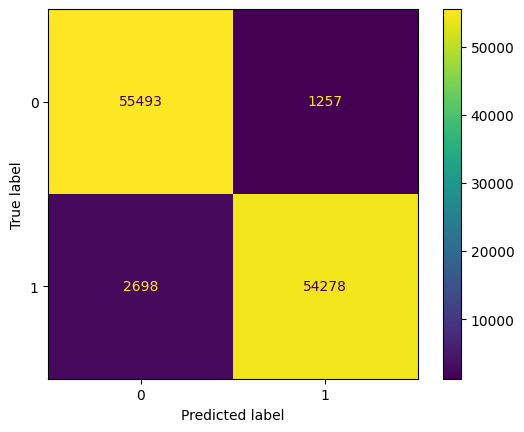

In [ ]:
ConfusionMatrixDisplay.from_estimator(log_reg, x_test, y_test)

In [ ]:
log_report = classification_report(y_test, log_reg.predict(x_test), digits=4)
print(log_report)

              precision    recall  f1-score   support

           0     0.9536    0.9779    0.9656     56750
           1     0.9774    0.9526    0.9648     56976

    accuracy                         0.9652    113726
   macro avg     0.9655    0.9652    0.9652    113726
weighted avg     0.9655    0.9652    0.9652    113726



---
##Random Forest

In [ ]:
rand_forest = RandomForestClassifier()
rand_forest.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
RF_acc_train = rand_forest.score(x_train , y_train)
RF_acc_test = rand_forest.score(x_test , y_test)
print(f"Training accuracy: {round(RF_acc_train , 4)}")
print(f"test accuracy: {round(RF_acc_test , 4)}")

Training accuracy: 1.0
test accuracy: 0.9999


In [ ]:
rand_forest.score(x_test , y_test)

0.9998768971035648

In [ ]:
RF_report = classification_report(y_test, rand_forest.predict(x_test), digits=4)
print(RF_report)

              precision    recall  f1-score   support

           0     1.0000    0.9998    0.9999     56750
           1     0.9998    1.0000    0.9999     56976

    accuracy                         0.9999    113726
   macro avg     0.9999    0.9999    0.9999    113726
weighted avg     0.9999    0.9999    0.9999    113726



---
##XG Boost

In [ ]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_acc_train = xgb.score(x_train , y_train)
xgb_acc_test = xgb.score(x_test , y_test)
print(f"Training accuracy: {round(xgb_acc_train , 4)}")
print(f"test accuracy: {round(xgb_acc_test , 4)}")

Training accuracy: 1.0
test accuracy: 0.9997


#Compare Models

In [ ]:
df_accurecies = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
                               'Training Accuracy': [log_acc_train, RF_acc_train, xgb_acc_train],
                               'Test Accuracy': [log_acc_test, RF_acc_test, xgb_acc_test]})

In [ ]:
df_accurecies

,Model,Training Accuracy,Test Accuracy
0,Logistic Regression,0.964900,0.965223
1,Random Forest,1.000000,0.999877
2,XGBoost,0.999985,0.999692


#Save The Model

In [ ]:
import pickle
import time

In [ ]:
rand_forest = pickle.load(open('Rand_forest.pkl', 'rb'))
log_reg = pickle.load(open('log_reg.pkl', 'rb'))
xgb = pickle.load(open('xgb.pkl', 'rb'))


In [ ]:
pickle.dump(rand_forest, open('Rand_forest.pkl', 'wb'))
pickle.dump(log_reg, open('log_reg.pkl', 'wb'))
pickle.dump(xgb, open('xgb.pkl', 'wb'))

In [ ]:
start = time.time()
log_reg.predict(x_test)
end = time.time()
print(end - start)

0.01067042350769043


In [ ]:
start = time.time()
rand_forest.predict(x_test)
end = time.time()
print(end - start)

1.327815294265747


In [ ]:
start = time.time()
xgb.predict(x_test)
end = time.time()
print(end - start)

0.28077197074890137


In [ ]:
model = pickle.load(open('Rand_forest.pkl', 'rb'))